# Unemployment and Profits Analysis #

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

budgets = pd.read_csv('Data/tn.movie_budgets.csv')

## Clean Budgets Data Set ##

### money strings to integers ###

In [261]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [262]:
def string_to_int(num_str) :
    return int(num_str.replace('$', '').replace(',', ''))

In [263]:
budgets.production_budget = budgets.production_budget.apply(string_to_int)
budgets.domestic_gross = budgets.domestic_gross.apply(string_to_int)
budgets.worldwide_gross = budgets.worldwide_gross.apply(string_to_int)

In [264]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### release date strings to datetime ###

In [265]:
# example process
example = budgets.release_date[0]
example

'Dec 18, 2009'

In [266]:
# remove comma from sring
example.replace(',', '')

'Dec 18 2009'

In [267]:
# remove commas from all dates
budgets.release_date = budgets.release_date.apply(lambda x : x.replace(',',''))

In [268]:
from datetime import datetime
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Jun 7 2019,Dark Phoenix,350000000,42762350,149762350
3,4,May 1 2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [269]:
# turn release_date into datetime format
budgets.release_date = pd.to_datetime(budgets.release_date, format = '%b %d %Y')

In [270]:
budgets_unrate = budgets

In [271]:
budgets_unrate.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [272]:
# info from 1915-02-08 to 2020-12-31
budgets_unrate.release_date.max()

Timestamp('2020-12-31 00:00:00')

### More Cleaning ###

In [273]:
# sort data frame by release_date
budgets_unrate = budgets_unrate.sort_values(by = 'release_date')
budgets_unrate.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000
5523,24,1916-09-05,Intolerance,385907,0,0
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000


In [274]:
# rename worldwide_gross to total_gross
budgets_unrate.rename(columns = {'worldwide_gross' : 'total_gross'}, inplace = True)
budgets_unrate.head()

,id,release_date,movie,production_budget,domestic_gross,total_gross
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000
5523,24,1916-09-05,Intolerance,385907,0,0
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000


In [275]:
# determine profitability for each movie as ratio of total_gross / production_budget
budgets_unrate['profitability'] = budgets_unrate['total_gross'] / budgets_unrate['production_budget']
budgets_unrate.head()

,id,release_date,movie,production_budget,domestic_gross,total_gross,profitability
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000,100.000000
5523,24,1916-09-05,Intolerance,385907,0,0,0.000000
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,40.000000
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,30.000000
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000,89.795918


In [276]:
budgets_unrate.to_csv('Data/budgets_UNRATE.csv')

## BLS unemployment rate ##

In [277]:
unrate = pd.read_csv('Data/UNRATE.csv')
unrate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [278]:
# convert DATE from string to datetime
unrate.DATE = pd.to_datetime(unrate.DATE)
unrate.DATE.dtype

dtype('<M8[ns]')

In [281]:
# trim dataframe to only include years 2000 - 2020
unrate_2000s = unrate[unrate.DATE >= '2000-01-01']
unrate_2000s

,DATE,UNRATE
624,2000-01-01,4.0
625,2000-02-01,4.1
626,2000-03-01,4.0
627,2000-04-01,3.8
628,2000-05-01,4.0
...,...,...
866,2020-03-01,4.4
867,2020-04-01,14.7
868,2020-05-01,13.3
869,2020-06-01,11.1


Text(0, 0.5, 'Unemployment Rate (%)')

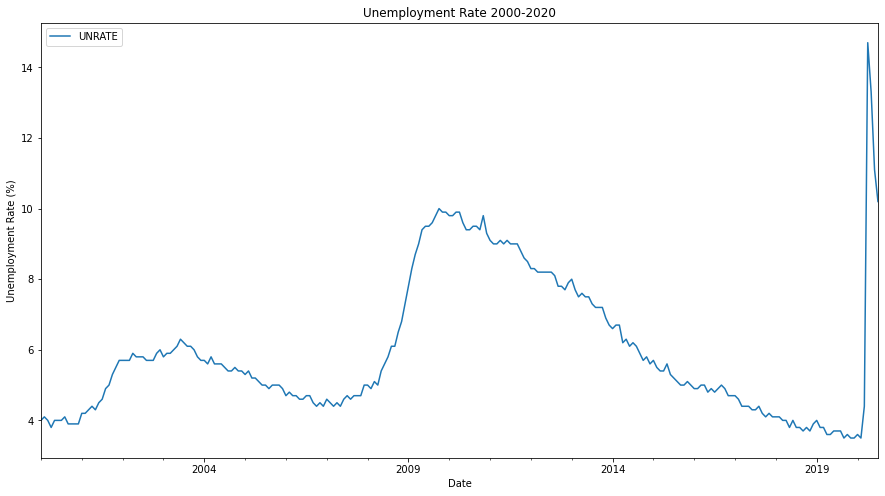

In [282]:
# show unemployment rate lineplot
unrate_2000s.set_index('DATE').plot(figsize = (15, 8))
plt.title('Unemployment Rate 2000-2020')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')

## Clean budgets_unrate for merging with unrate ##

In [69]:
budgets_unrate.head()

,id,release_date,movie,production_budget,domestic_gross,total_gross,profitability
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000,100.000000
5523,24,1916-09-05,Intolerance,385907,0,0,0.000000
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,40.000000
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,30.000000
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000,89.795918


In [73]:
# retunr data frame with zeroes for profitability removed
no_zeroes = budgets_unrate[budgets_unrate.profitability != 0]

In [75]:
print(no_zeroes.shape)
no_zeroes.head()

(5415, 7)


,id,release_date,movie,production_budget,domestic_gross,total_gross,profitability
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000,100.000000
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,40.000000
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,30.000000
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000,89.795918
4569,70,1925-12-30,Ben-Hur: A Tale of the Christ,3900000,9000000,9000000,2.307692


In [144]:
# trim dataframe to only include years 2000 - 2020
no_zeroes = no_zeroes[no_zeroes.release_date >= '2000-01-01']

## Correlation Between Unemployment Rate and Movie Profits ##

### We'll begin by examining the mean profitability per month for all movies released in a given month ###

In [313]:
# set index to release_date and then find monthly averages
mean_profitability = no_zeroes.set_index('release_date').resample('MS').mean().round(1)
mean_profitability.head()

,id,production_budget,domestic_gross,total_gross,profitability
release_date,,,,,
2000-01-01,56.9,16391666.7,16155186.9,16925577.1,2.6
2000-02-01,52.4,25016666.7,35793094.1,53262659.5,2.7
2000-03-01,52.2,28476470.6,29370912.2,50799318.2,2.5
2000-04-01,44.5,25343750.0,27142489.6,40119715.4,2.1
2000-05-01,40.4,35770588.2,44821285.3,99353144.6,1.9


In [318]:
# set index on unrate to DATE to be able to merge both data sets
df = unrate_2000s.set_index('DATE')
df.head()

,UNRATE
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [323]:
# left join onto unrate_2000s with mean_profitability
unrate_means = df.join(mean_profitability).dropna(axis = 0)
unrate_means

,UNRATE,id,production_budget,domestic_gross,total_gross,profitability
DATE,,,,,,
2000-01-01,4.0,56.9,16391666.7,16155186.9,16925577.1,2.6
2000-02-01,4.1,52.4,25016666.7,35793094.1,53262659.5,2.7
2000-03-01,4.0,52.2,28476470.6,29370912.2,50799318.2,2.5
2000-04-01,3.8,44.5,25343750.0,27142489.6,40119715.4,2.1
2000-05-01,4.0,40.4,35770588.2,44821285.3,99353144.6,1.9
...,...,...,...,...,...,...
2019-02-01,3.8,44.6,50150909.1,51701310.5,130211312.5,2.7
2019-03-01,3.8,74.4,71857142.9,118632592.9,277861578.0,5.3
2019-04-01,3.6,67.2,41500000.0,56610229.0,130832996.8,2.8


**Mean Profitabilily by Unemploymet Rate**

Text(0, 0.5, 'Mean Movie Profitability (total_gross / production_budget)')

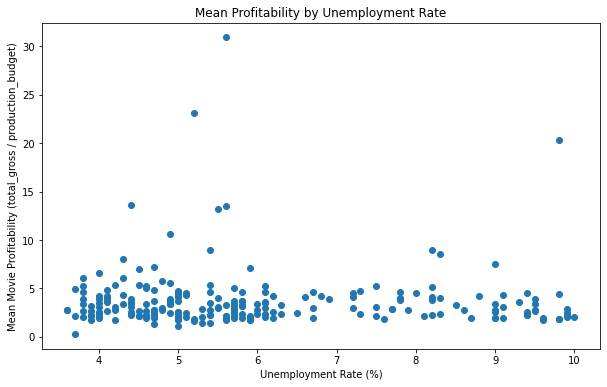

In [324]:
# scatterplot to examine possible correlation between unemployment rate and profitability
plt.figure(figsize = (10,6))
plt.scatter(unrate_means.UNRATE, unrate_means.profitability)
plt.title('Mean Profitability by Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Mean Movie Profitability (total_gross / production_budget)')

**Mean Total Gross by Unemployment Rate**

Text(0, 0.5, 'Mean Total Movie Gross')

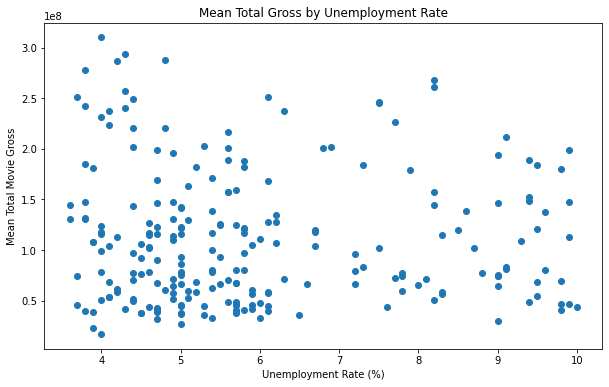

In [325]:
# scatterplot to examine possible correlation between unemployment rate and total_gross
plt.figure(figsize = (10,6))
plt.scatter(unrate_means.UNRATE, unrate_means.total_gross)
plt.title('Mean Total Gross by Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Mean Total Movie Gross')

### Median profitability per month for all movies in a month ##

In [326]:
# use medians instead of mean
median_profitability = no_zeroes.set_index('release_date').resample('MS').median().round(1)
median_profitability

,id,production_budget,domestic_gross,total_gross,profitability
release_date,,,,,
2000-01-01,53.0,9000000.0,14218868.0,14816494.0,1.2
2000-02-01,51.0,23500000.0,37636498.5,45823161.0,2.8
2000-03-01,65.0,20000000.0,15427192.0,24355762.0,1.5
2000-04-01,44.0,19500000.0,30051710.5,33466292.0,1.5
2000-05-01,37.0,16000000.0,17200925.0,18642318.0,1.2
...,...,...,...,...,...
2019-02-01,36.0,20000000.0,32138862.0,62599159.0,2.4
2019-03-01,91.0,25000000.0,45729221.0,115149422.0,3.0
2019-04-01,69.0,35500000.0,38314222.0,75113319.0,2.6


In [327]:
# left join onto unrate_2000s with median_profitability
unrate_medians = df.join(median_profitability).dropna(axis = 0)
unrate_medians

,UNRATE,id,production_budget,domestic_gross,total_gross,profitability
DATE,,,,,,
2000-01-01,4.0,53.0,9000000.0,14218868.0,14816494.0,1.2
2000-02-01,4.1,51.0,23500000.0,37636498.5,45823161.0,2.8
2000-03-01,4.0,65.0,20000000.0,15427192.0,24355762.0,1.5
2000-04-01,3.8,44.0,19500000.0,30051710.5,33466292.0,1.5
2000-05-01,4.0,37.0,16000000.0,17200925.0,18642318.0,1.2
...,...,...,...,...,...,...
2019-02-01,3.8,36.0,20000000.0,32138862.0,62599159.0,2.4
2019-03-01,3.8,91.0,25000000.0,45729221.0,115149422.0,3.0
2019-04-01,3.6,69.0,35500000.0,38314222.0,75113319.0,2.6


**Median Profitability by Unemployment Rate**

Text(0, 0.5, 'Median Movie Profitability (total_gross / production_budget)')

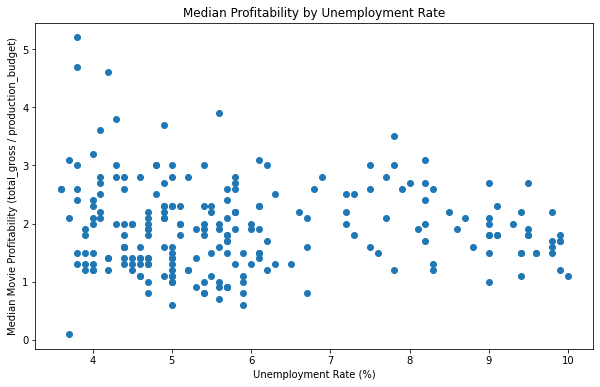

In [329]:
# scatterplot to examine possible correlation between unemployment rate and profitability
plt.figure(figsize = (10,6))
plt.scatter(unrate_medians.UNRATE, unrate_medians.profitability)
plt.title('Median Profitability by Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Median Movie Profitability (total_gross / production_budget)')

**Median Total Gross by Unemployment Rate**

Text(0, 0.5, 'Median Total Gross')

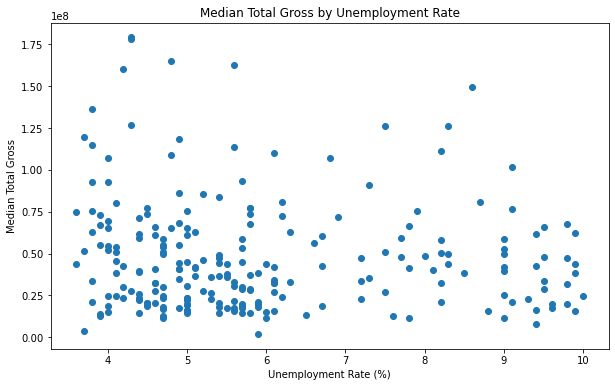

In [330]:
plt.figure(figsize = (10,6))
plt.scatter(unrate_medians.UNRATE, unrate_medians.total_gross)
plt.title('Median Total Gross by Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Median Total Gross')

## Conclusion ##

Our initial hypothesis was that there would be a correlation between Movie Profits and Unemployment rate. We hypothesized that as employment rate increase we would see a decrease in both total gross revenue and profitability of a movie. The more people are without jobs, the less money they would spend going to the movies. However, both anayleses of mean and median movie profits show that there is no correlation between them and unemployment rate. This paints a more complex picture as to what factors contribute to total gross revenue and profitability for a movie. There maybe other factors such as 